# Booking Demand Density Generation

In [1]:
import math
import datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
sns.set(style="whitegrid")

## The Data

### Load the preprocessed data

In [2]:
df = pd.read_csv('full_data.csv')
df.head()

,geohash6,day,demand,in_raw,weekday,hour,minutes,ds,latitude,longitude
0,qp09du,1,0.000000,False,1,0,0,1900-01-01 00:00:00,-5.336609,90.829468
1,qp09jm,1,0.000000,False,1,0,0,1900-01-01 00:00:00,-5.419006,90.939331
2,qp09sf,1,0.000000,False,1,0,0,1900-01-01 00:00:00,-5.347595,90.917358
3,qp09vd,1,0.000000,False,1,0,0,1900-01-01 00:00:00,-5.303650,90.950317
4,qp03y4,1,0.002732,True,1,0,0,1900-01-01 00:00:00,-5.303650,90.620728


### Get info on the coordinates

In [3]:
n_lat  = len(df['latitude'].unique())
n_long = len(df['longitude'].unique())
print(n_lat, n_long)

46 36


In [4]:
lat_min  = df['latitude'].min()
long_min = df['longitude'].min()
print(lat_min, long_min)

-5.48492431640625 90.5877685546875


In [5]:
lat_sorted  = np.sort(df['latitude'].unique())
long_sorted = np.sort(df['longitude'].unique())

In [6]:
lat_gap  = (lat_sorted[1:] - lat_sorted[:-1]).min()
long_gap = (long_sorted[1:] - long_sorted[:-1]).min()

## Generate Demand Density Images

In [7]:
images = np.zeros((4*24*61, 48, 40))
mask = np.zeros((48, 40))

In [8]:
latitude_i  = ((df['latitude'].values  - lat_min)  / lat_gap).astype(int)
longitude_j = ((df['longitude'].values - long_min) / long_gap).astype(int)

In [9]:
timesteps = 4*24*(df['day'].values-1) + 4*df['hour'].values + df['minutes'].values//15
demands   = df['demand'].values

In [10]:
%%time
for i in range(len(timesteps)):
    t = timesteps[i]
    d = demands[i]
    x = latitude_i[i]
    y = longitude_j[i]
    images[t][x+1][y+2] = d
    mask[x+1][y+2] = 1

Wall time: 57 s


### Inspect

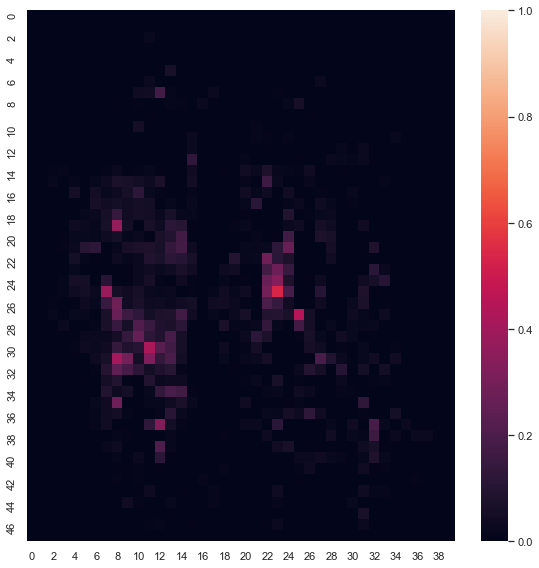

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
sns.heatmap(images[0], vmin=0.0, vmax=1.0)
plt.tight_layout()
plt.show()

### Save images

In [12]:
np.save('density_images.npy', images)
np.save('density_mask.npy', mask)